In [40]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [42]:
data1 = pd.read_csv("/kaggle/input/newdataset/test.csv")

In [43]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [44]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [45]:
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
data1.shape

(418, 12)

In [47]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [48]:
data1['Age'].fillna(data1['Age'].median(), inplace=True)
data1.duplicated().sum()

0

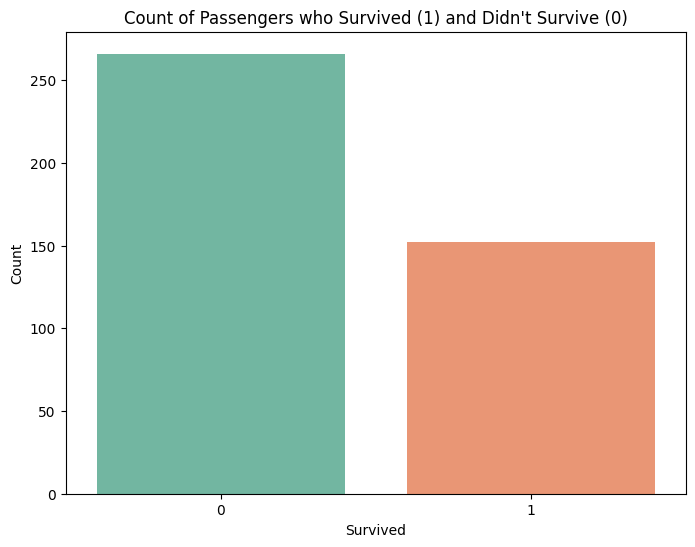

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data1, x='Survived', palette="Set2")
plt.title("Count of Passengers who Survived (1) and Didn't Survive (0)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

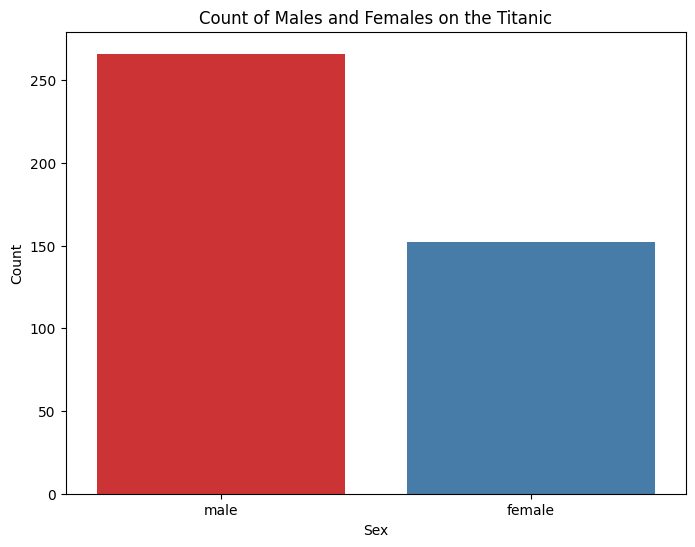

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data1, x='Sex', palette="Set1")
plt.title("Count of Males and Females on the Titanic")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

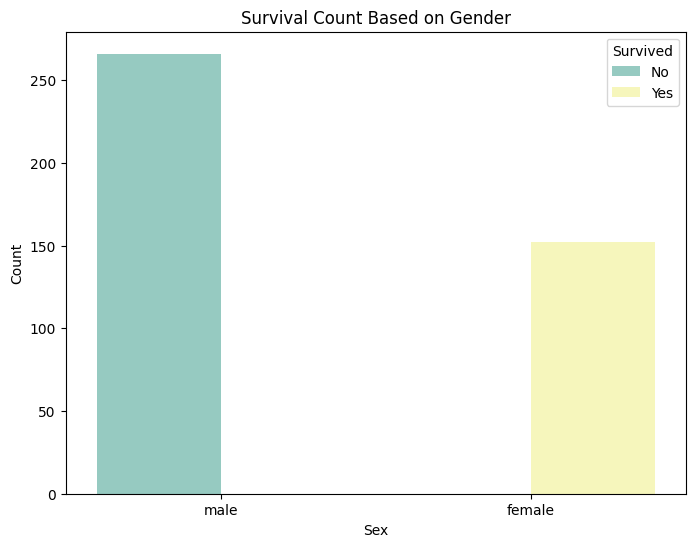

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data1, x='Sex', hue='Survived', palette="Set3")
plt.title("Survival Count Based on Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

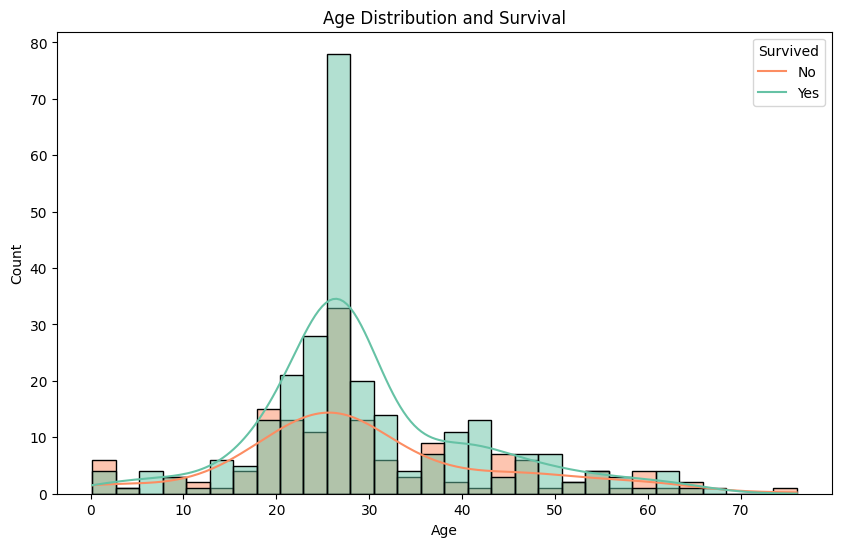

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data1, x='Age', hue='Survived', bins=30, kde=True, palette="Set2")
plt.title("Age Distribution and Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

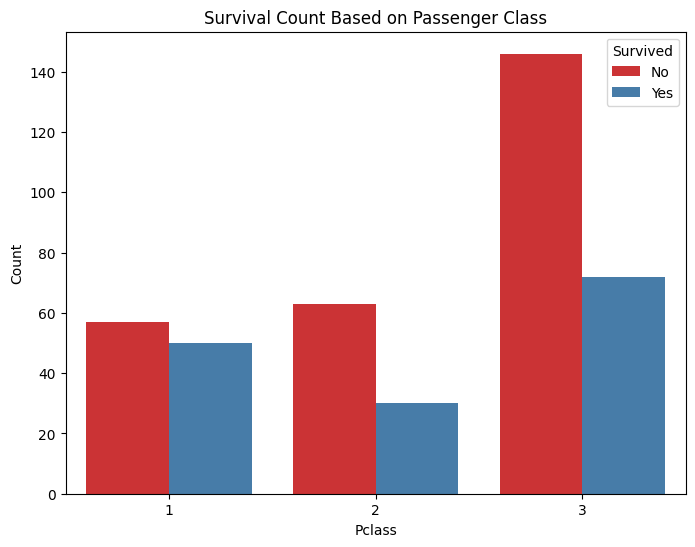

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data1, x='Pclass', hue='Survived', palette="Set1")
plt.title("Survival Count Based on Passenger Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

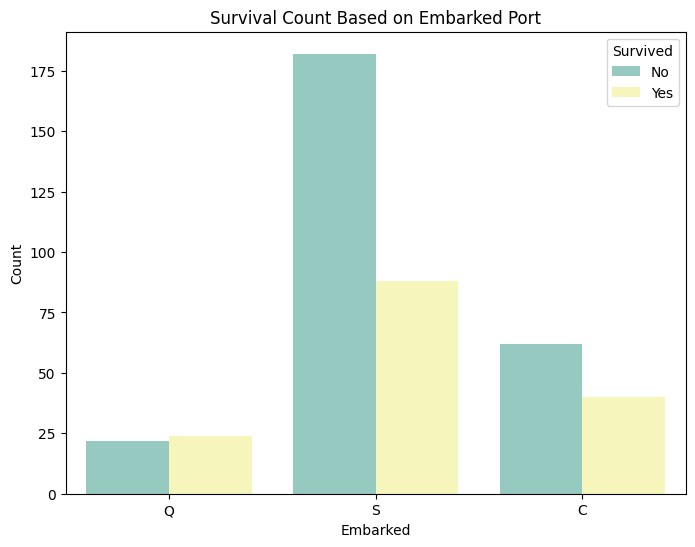

In [54]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data1, x='Embarked', hue='Survived', palette="Set3")
plt.title("Survival Count Based on Embarked Port")
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

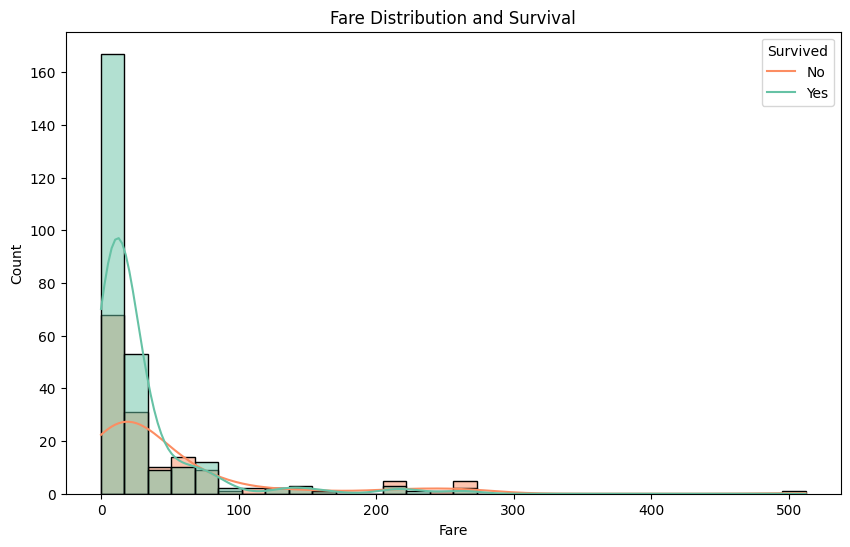

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data1, x='Fare', hue='Survived', bins=30, kde=True, palette="Set2")
plt.title("Fare Distribution and Survival")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

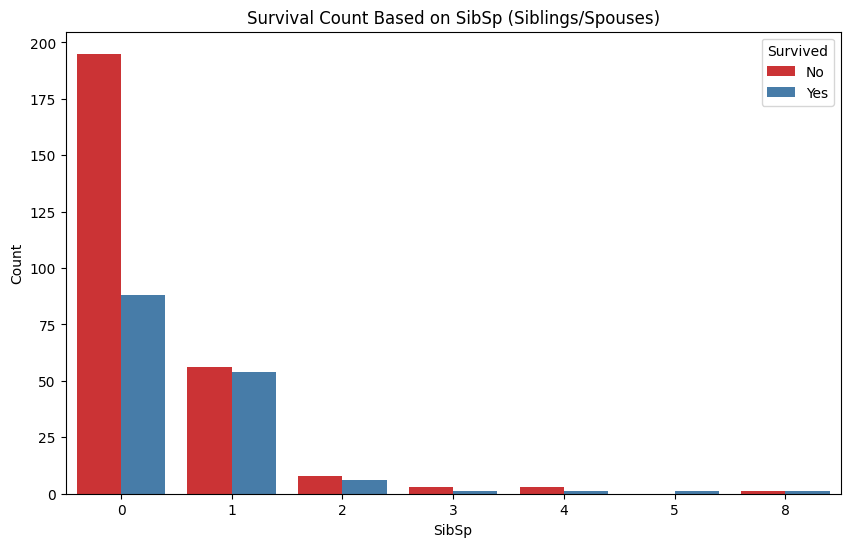

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data1, x='SibSp', hue='Survived', palette="Set1")
plt.title("Survival Count Based on SibSp (Siblings/Spouses)")
plt.xlabel("SibSp")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

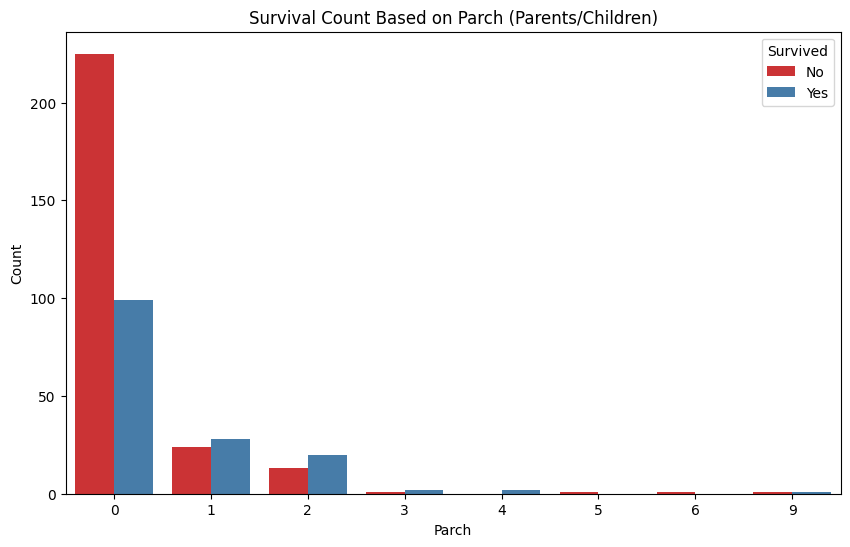

In [57]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data1, x='Parch', hue='Survived', palette="Set1")
plt.title("Survival Count Based on Parch (Parents/Children)")
plt.xlabel("Parch")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [58]:
data1.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis=1, inplace=True)
X = data1.drop("Survived", axis=1)
y = data1["Survived"]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
numeric_features = ["Age", "SibSp", "Parch", "Fare"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [61]:
categorical_features = ["Sex", "Embarked", "Pclass"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [62]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ])

In [63]:
classifiers = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVC": SVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [64]:
for clf_name, clf in classifiers.items():
    model = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(report)
    print("\n")

Classifier: Random Forest
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



Classifier: SVC
Accuracy: 0.99
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



Classifier: Logistic Regression
Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   ma

In [65]:
passenger_data = pd.DataFrame({
    'Pclass': [1],
    'Sex': ['female'],
    'Age': [100],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [10],
    'Cabin': ['Unknown'],
    'Embarked': ['P']
})

In [66]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(n_estimators=100, random_state=42))
])

In [67]:
model.fit(X, y)
prediction = model.predict(passenger_data)

In [68]:
answer="passenger survived" if prediction[0]==1 else "passenger not survived"
answer

'passenger survived'